- 필요한 모듈과 MNIST 데이터를 로드한다.
- 랜덤 시드 값을 설정한다.
- 각 단계의 필터 수, 커널 크기 등을 설정한다.

In [1]:
'''
UOS 2019-2 AI
MNIST project
2015920003 컴퓨터과학부 김건호
'''

# use tensorflow 1
%tensorflow_version 1.x

# import libraries
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import math

# import mnist data
# WARNING: read_data_sets (from tensorflow.contrib.learn.python.learn.datasets.mnist) is deprecated.
# TODO: Use alternatives such as official/mnist/dataset.py from tensorflow/models.
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("/tmp/data/", one_hot = True)

# set random seed
random_seed = 2015920003
np.random.seed(random_seed)
tf.set_random_seed(random_seed)

# set constants: size of filter, the number of filters, k-size, strides, and padding
size_filter  =  3
num_filters1 = 32
num_filters2 = 64
num_filters3 = 128
k_size       = [1, 2, 2, 1]
strides      = [1, 2, 2, 1]
padding      = 'SAME'

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting /tmp/data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting /tmp/data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting /tmp/data/t10k-images-idx3-ubyte.gz
Extracting /tmp/data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


- 입력층을 정의한다.
- 각 층의 합성곱 필터와 풀링 계층을 정의한다.

In [0]:
# define format of input
x         = tf.placeholder(tf.float32, [None, 784])
x_image   = tf.reshape(x, [-1, 28, 28, 1])

# define each convolution & pooling layers

# neural network 1
# 1st layer
w_conv11 = tf.Variable(tf.truncated_normal([size_filter, size_filter, 1, num_filters1], stddev = 0.1))
h_conv11 = tf.nn.conv2d(x_image, w_conv11, [1, 1, 1, 1], padding)
b_conv11 = tf.Variable(tf.constant(0.1, shape = [num_filters1]))
h_valu11 = tf.nn.relu(h_conv11 + b_conv11)
h_pool11 = (tf.nn.avg_pool(h_valu11, k_size, strides, padding) + tf.nn.max_pool(h_valu11, k_size, strides, padding)) / 2
# 2nd layer
w_conv12 = tf.Variable(tf.truncated_normal([size_filter, size_filter, num_filters1, num_filters2], stddev = 0.1))
h_conv12 = tf.nn.conv2d(h_pool11, w_conv12, [1, 1, 1, 1], padding)
b_conv12 = tf.Variable(tf.constant(0.1, shape = [num_filters2]))
h_valu12 = tf.nn.relu(h_conv12 + b_conv12)
h_pool12 = (tf.nn.avg_pool(h_valu12, k_size, strides, padding) + tf.nn.max_pool(h_valu12, k_size, strides, padding)) / 2
# 3rd layer
w_conv13 = tf.Variable(tf.truncated_normal([size_filter, size_filter, num_filters2, num_filters3], stddev = 0.1))
h_conv13 = tf.nn.conv2d(h_pool12, w_conv13, [1, 1, 1, 1], padding)
b_conv13 = tf.Variable(tf.constant(0.1, shape = [num_filters3]))
h_valu13 = tf.nn.relu(h_conv13 + b_conv13)
h_pool13 = (tf.nn.avg_pool(h_valu13, k_size, strides, padding) + tf.nn.max_pool(h_valu13, k_size, strides, padding)) / 2

# neural network 2
# 1st layer
w_conv21 = tf.Variable(tf.truncated_normal([size_filter, size_filter, 1, num_filters1], stddev = 0.1))
h_conv21 = tf.nn.conv2d(x_image, w_conv21, [1, 1, 1, 1], padding)
b_conv21 = tf.Variable(tf.constant(0.1, shape = [num_filters1]))
h_valu21 = tf.nn.relu(h_conv21 + b_conv21)
h_pool21 = (tf.nn.avg_pool(h_valu21, k_size, strides, padding) + tf.nn.max_pool(h_valu21, k_size, strides, padding)) / 2
# 2nd layer
w_conv22 = tf.Variable(tf.truncated_normal([size_filter, size_filter, num_filters1, num_filters2], stddev = 0.1))
h_conv22 = tf.nn.conv2d(h_pool21, w_conv22, [1, 1, 1, 1], padding)
b_conv22 = tf.Variable(tf.constant(0.1, shape = [num_filters2]))
h_valu22 = tf.nn.relu(h_conv22 + b_conv22)
h_pool22 = (tf.nn.avg_pool(h_valu22, k_size, strides, padding) + tf.nn.max_pool(h_valu22, k_size, strides, padding)) / 2
# 3rd layer
w_conv23 = tf.Variable(tf.truncated_normal([size_filter, size_filter, num_filters2, num_filters3], stddev = 0.1))
h_conv23 = tf.nn.conv2d(h_pool22, w_conv23, [1, 1, 1, 1], padding)
b_conv23 = tf.Variable(tf.constant(0.1, shape = [num_filters3]))
h_valu23 = tf.nn.relu(h_conv23 + b_conv23)
h_pool23 = (tf.nn.avg_pool(h_valu23, k_size, strides, padding) + tf.nn.max_pool(h_valu23, k_size, strides, padding)) / 2

- 전 결합층, 드롭아웃 계층, 출력을 정의한다.
- p1, p2는 각 신경망의 출력이고, p3는 p1, p2의 평균값이다.



In [0]:
# set the size of fully connected layers
num_units3 = h_pool13.shape.dims[1] * h_pool13.shape.dims[2] * num_filters3
num_units4 = 1024
num_units5 = 512

# probabilities of dropout
keep_prob1 = tf.placeholder(tf.float32)
keep_prob2 = tf.placeholder(tf.float32)

# define each fully connected layers and dropout

# neural network 1
w_fc11 = tf.Variable(tf.truncated_normal([num_units3, num_units4], stddev = 0.1))
b_fc11 = tf.Variable(tf.constant(0.1, shape = [num_units4]))
w_fc12 = tf.Variable(tf.truncated_normal([num_units4, num_units5], stddev = 0.1))
b_fc12 = tf.Variable(tf.constant(0.1, shape = [num_units5]))

h_pool13_flat = tf.reshape(h_pool13, [-1, h_pool13.shape.dims[1] * h_pool13.shape.dims[2] * num_filters3])
h_fc11 = tf.nn.leaky_relu(tf.matmul(h_pool13_flat, w_fc11) + b_fc11)
drop11 = tf.nn.dropout(h_fc11, rate = 1 - keep_prob1)
h_fc12 = tf.nn.leaky_relu(tf.matmul(drop11, w_fc12) + b_fc12)
drop12 = tf.nn.dropout(h_fc12, rate = 1 - keep_prob2)

# neural network 2
w_fc21 = tf.Variable(tf.truncated_normal([num_units3, num_units4], stddev = 0.1))
b_fc21 = tf.Variable(tf.constant(0.1, shape = [num_units4]))
w_fc22 = tf.Variable(tf.truncated_normal([num_units4, num_units5], stddev = 0.1))
b_fc22 = tf.Variable(tf.constant(0.1, shape = [num_units5]))

h_pool23_flat = tf.reshape(h_pool23, [-1, h_pool23.shape.dims[1] * h_pool23.shape.dims[2] * num_filters3])
h_fc21 = tf.nn.leaky_relu(tf.matmul(h_pool23_flat, w_fc21) + b_fc21)
drop21 = tf.nn.dropout(h_fc21, rate = 1 - keep_prob1)
h_fc22 = tf.nn.leaky_relu(tf.matmul(drop21, w_fc22) + b_fc22)
drop22 = tf.nn.dropout(h_fc22, rate = 1 - keep_prob2)

# softmax output
p1 = tf.nn.softmax(tf.matmul(drop12, tf.Variable(tf.zeros([num_units5, 10]))))
p2 = tf.nn.softmax(tf.matmul(drop22, tf.Variable(tf.zeros([num_units5, 10]))))
p3 = (p1 + p2) / 2

- loss, train_step, accuracy를 정의한다.
- loss 계산시 underflow 에러가 나지 않도록, 결과에 작은 값을 더한다.

In [0]:
t = tf.placeholder(tf.float32, [None, 10])
loss_w_coefficient = tf.placeholder(tf.float32)

# calculate loss from neural network 1
loss_p1 = -tf.reduce_sum(t * tf.log(p1 + 0.00000000000000000000001)) # add small number to prevent underflow
w_conv_flat11 = tf.reshape(w_conv11, [-1])
w_conv_flat12 = tf.reshape(w_conv12, [-1])
w_conv_flat13 = tf.reshape(w_conv13, [-1])
w_fc_flat11   = tf.reshape(w_fc11,   [-1])
w_fc_flat12   = tf.reshape(w_fc12,   [-1])

loss_w1 = 0
loss_w1 += tf.nn.l2_loss(w_conv_flat11) / tf.cast(w_conv_flat11.shape[0], dtype=tf.float32)
loss_w1 += tf.nn.l2_loss(w_conv_flat12) / tf.cast(w_conv_flat12.shape[0], dtype=tf.float32)
loss_w1 += tf.nn.l2_loss(w_conv_flat13) / tf.cast(w_conv_flat13.shape[0], dtype=tf.float32)
loss_w1 += tf.nn.l2_loss(w_fc_flat11)   / tf.cast(w_fc_flat11.shape[0],   dtype=tf.float32)
loss_w1 += tf.nn.l2_loss(w_fc_flat12)   / tf.cast(w_fc_flat12.shape[0],   dtype=tf.float32)
loss1 = loss_p1 + loss_w1 * loss_w_coefficient

# calculate loss from neural network 2
loss_p2 = -tf.reduce_sum(t * tf.log(p2 + 0.00000000000000000000001)) # add small number to prevent underflow
w_conv_flat21 = tf.reshape(w_conv21, [-1])
w_conv_flat22 = tf.reshape(w_conv22, [-1])
w_conv_flat23 = tf.reshape(w_conv23, [-1])
w_fc_flat21   = tf.reshape(w_fc21,   [-1])
w_fc_flat22   = tf.reshape(w_fc22,   [-1])

loss_w2 = 0
loss_w2 += tf.nn.l2_loss(w_conv_flat21) / tf.cast(w_conv_flat21.shape[0], dtype=tf.float32)
loss_w2 += tf.nn.l2_loss(w_conv_flat22) / tf.cast(w_conv_flat22.shape[0], dtype=tf.float32)
loss_w2 += tf.nn.l2_loss(w_conv_flat23) / tf.cast(w_conv_flat23.shape[0], dtype=tf.float32)
loss_w2 += tf.nn.l2_loss(w_fc_flat21)   / tf.cast(w_fc_flat21.shape[0],   dtype=tf.float32)
loss_w2 += tf.nn.l2_loss(w_fc_flat22)   / tf.cast(w_fc_flat22.shape[0],   dtype=tf.float32)
loss2 = loss_p2 + loss_w2 * loss_w_coefficient

# calculate loss of ensemble
loss_p3 = -tf.reduce_sum(t * tf.log(p3 + 0.00000000000000000000001))

# set the learning rate and train
learning_rate = tf.placeholder(tf.float32)
train_step1 = tf.train.AdamOptimizer(learning_rate).minimize(loss1)
train_step2 = tf.train.AdamOptimizer(learning_rate).minimize(loss2)

# calculate accuracy of each neural networks
correct_prediction1 = tf.equal(tf.argmax(p1, 1), tf.argmax(t, 1))
accuracy1           = tf.reduce_mean(tf.cast(correct_prediction1, tf.float32))
correct_prediction2 = tf.equal(tf.argmax(p2, 1), tf.argmax(t, 1))
accuracy2           = tf.reduce_mean(tf.cast(correct_prediction2, tf.float32))

# calculate accuracy of ensemble
correct_prediction_total = tf.equal(tf.argmax(p3, 1), tf.argmax(t, 1))
accuracy_total           = tf.reduce_mean(tf.cast(correct_prediction_total, tf.float32))

- 세션을 준비하고 Variable을 초기화한다.

In [0]:
sess = tf.InteractiveSession()
sess.run(tf.global_variables_initializer())
saver = tf.train.Saver()

학습과정
- 학습을 시작하기 전, 성능을 테스트한다.
    - 10% 정도의 정확도를 가질 것으로 예상할 수 있다.
- 1단계 학습
    - 총 1400번의 학습을 진행한다.
    - batch size는 200 ~ 300으로 한다.
    - learning rate는 0.00375 ~ 0.0025로 한다.
    - dropout 비율은 0.5로 한다.
    - 100번째 학습마다 성능을 테스트한다.
    - 50번째 학습마다 batch size, learning rate, loss_coefficient를 재조정한다.
- 2단계 학습
    - 총 600번의 학습을 진행한다.
    - batch size는 400 ~ 600으로 한다.
    - learning rate는 0.0002 ~ 0.00000001로 한다.
    - dropout 비율은 0.5로 한다.
    - 100번째 학습마다 성능을 테스트한다.
    - 50번째 학습마다 batch size, learning rate, loss_coefficient를 재조정한다.
- 학습 후
    - 학습에 설정한 값을 출력한다.
    - 학습 과정에서 달성한 maximum accuracy와 그 때의 iteration을 출력한다.

성능 테스트
- 테스트는 학습에 사용한 데이터셋(mnist.train)과 다른 것(mnist.test)을 사용한다.
- 테스트의 신뢰도를 위해, 테스트 결과를 학습하지 않는다(learning rate를 0으로 하여 구현).
- dropout을 사용하지 않는다(dropout 비율을 조정하여 구현).
- loss_coefficient를 0으로 한다.

최종적으로 테스트 데이터에 대해 약 99.4 ~ 99.5% 이상의 정답률을 얻을 수 있다.

In [0]:
learning_rates = [[0.00375, 0.0025], [0.0002, 0.00000001]]
batch_sizes = [[200, 300], [400, 600]]
iteration = [1400, 6000]
loss_coefficients = [[100, 400], [100, 0]]

epoch_acc = 0
epoch_loss = 0
acc_max = 0

def test(epoch):
    global epoch_acc, epoch_loss, acc_max
    _loss1, _loss_p1, _loss_w1, _acc1, _loss2, _loss_p2, _loss_w2, _acc2, _loss, _accuracy_total = sess.run([
        loss1, loss_p1, loss_w1, accuracy1,
        loss2, loss_p2, loss_w2, accuracy2,
        loss_p3, accuracy_total
    ], feed_dict = {
        x:mnist.test.images, t:mnist.test.labels,
        learning_rate:0, keep_prob1:1.0, keep_prob2:1.0,
        loss_w_coefficient:0
    })
    print ('Epoch: %5d, [1]: %7.2f(%7.2f, %.4f) %.6f, [2]: %7.2f(%7.2f, %.4f) %.6f, [=] %7.2f %.6f' % (
        epoch, _loss1, _loss_p1, _loss_w1, _acc1, _loss2, _loss_p2, _loss_w2, _acc2, _loss, _accuracy_total))

    if acc_max < _accuracy_total:
        acc_max = _accuracy_total
        epoch_acc = epoch
        saver.save(sess, 'cnn_session', global_step = epoch)

In [7]:
# test the neural network before training 1
test(0)

# train the neural networks
for n in range(len(iteration)):

    # initialize all variables
    _batch_size = batch_sizes[n][0]
    _learning_rate = learning_rates[n][0]
    _loss_coefficient = loss_coefficients[n][0]

    # train stage 1, 2
    for i in range(1, iteration[n] + 1):

        # get batch
        batch_xs, batch_ts = mnist.train.next_batch(_batch_size)

        # train
        sess.run([train_step1, train_step2], feed_dict = {
            x:batch_xs, t:batch_ts,
            learning_rate:_learning_rate,
            keep_prob1:0.5, keep_prob2:0.5,
            loss_w_coefficient:_loss_coefficient
        })

        # adjust variables
        if i % 50 == 0:
            _batch_size = round((batch_sizes[n][1] - batch_sizes[n][0]) * (i / iteration[n])) + batch_sizes[n][0]
            _learning_rate = (learning_rates[n][0] - learning_rates[n][1]) * (1 - math.sqrt(i / iteration[n])) + learning_rates[n][1]
            _loss_coefficient = (loss_coefficients[n][1] - loss_coefficients[n][0]) * math.pow(i / iteration[n], 3) + loss_coefficients[n][0]

        # test the neural network
        if i % 100 == 0:
            test(i)

# print the results
print ('iteration:', *iteration)
print ('learning_rates:', *learning_rates)
print ('batch_sizes:', *batch_sizes)
print ('loss_coefficients:', *loss_coefficients)

print ('MAX: acc: %f when %d' % (
    acc_max, epoch_acc))

Epoch:     0, [1]: 23025.85(23025.85, 0.0190) 0.098000, [2]: 23025.85(23025.85, 0.0194) 0.098000, [=] 23025.85 0.098000
Epoch:   100, [1]: 1051.88(1051.88, 0.0203) 0.964700, [2]: 1039.09(1039.09, 0.0206) 0.965900, [=]  949.67 0.967700
Epoch:   200, [1]:  665.12( 665.12, 0.0212) 0.978700, [2]:  790.02( 790.02, 0.0211) 0.973400, [=]  662.57 0.978200
Epoch:   300, [1]:  459.85( 459.85, 0.0216) 0.984400, [2]:  490.17( 490.17, 0.0215) 0.983900, [=]  405.47 0.987200
Epoch:   400, [1]:  397.09( 397.09, 0.0220) 0.987100, [2]:  408.85( 408.85, 0.0218) 0.985400, [=]  331.01 0.989500
Epoch:   500, [1]:  374.93( 374.93, 0.0221) 0.988000, [2]:  480.96( 480.96, 0.0219) 0.985400, [=]  349.23 0.989500
Epoch:   600, [1]:  355.08( 355.08, 0.0221) 0.988200, [2]:  389.01( 389.01, 0.0219) 0.987700, [=]  302.47 0.990100
Instructions for updating:
Use standard file APIs to delete files with this prefix.
Epoch:   700, [1]:  264.76( 264.76, 0.0220) 0.991500, [2]:  343.38( 343.38, 0.0217) 0.989600, [=]  259.80 

- 각 단계별 convolution filter를 표시한다.
- 두 신경망에서 5개의 테스트 데이터에 대해 convolution filter, pooling layer를 적용한 결과를 표시한다.

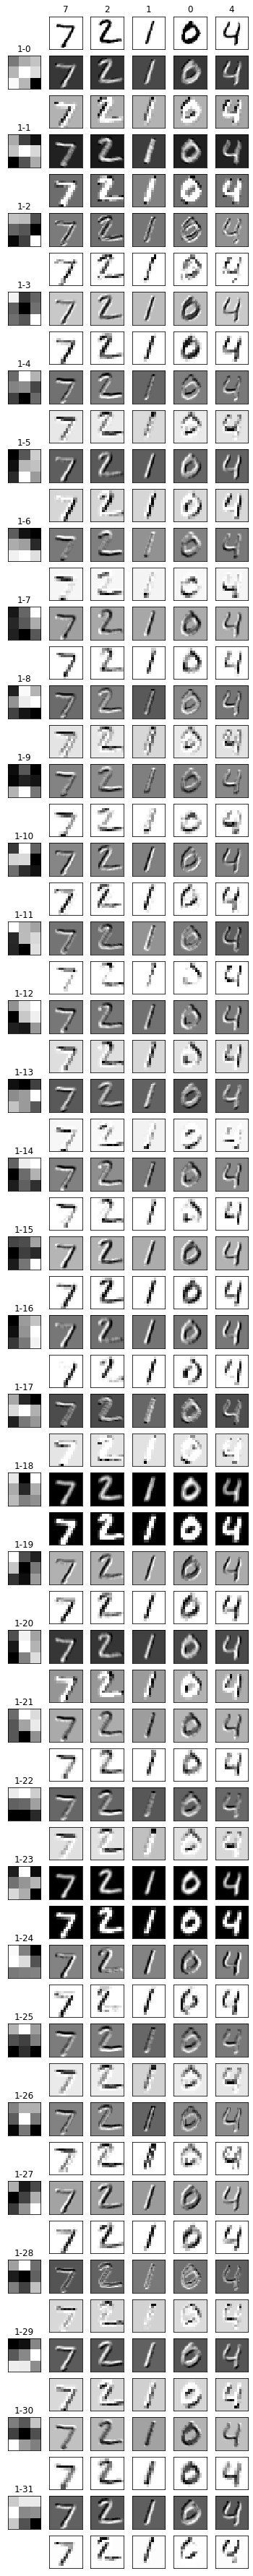

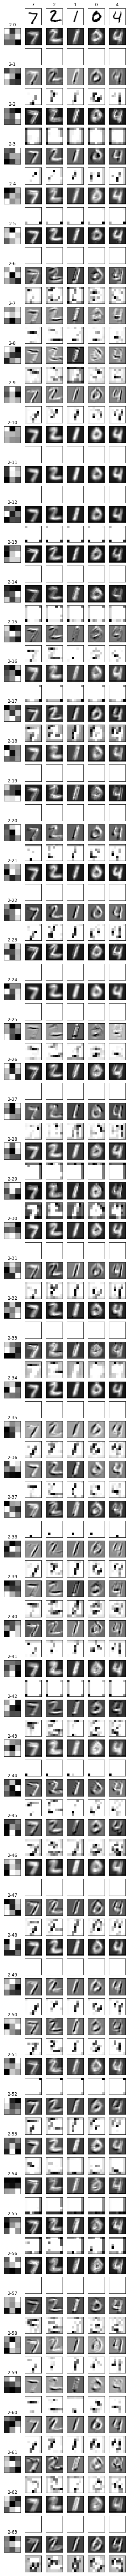

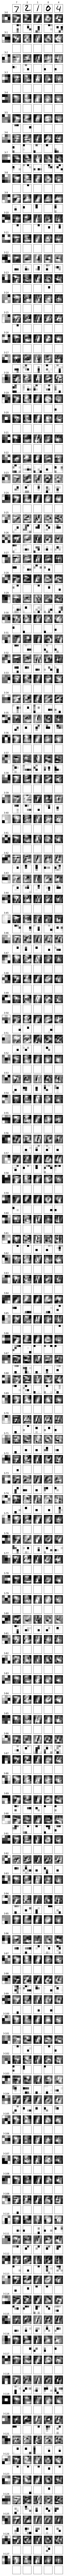

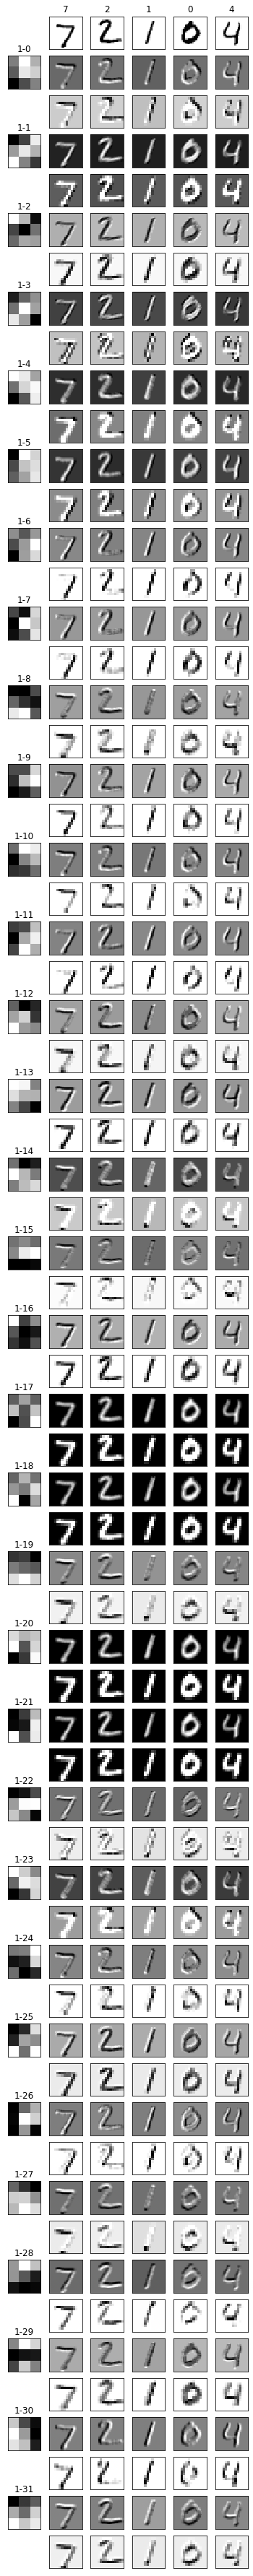

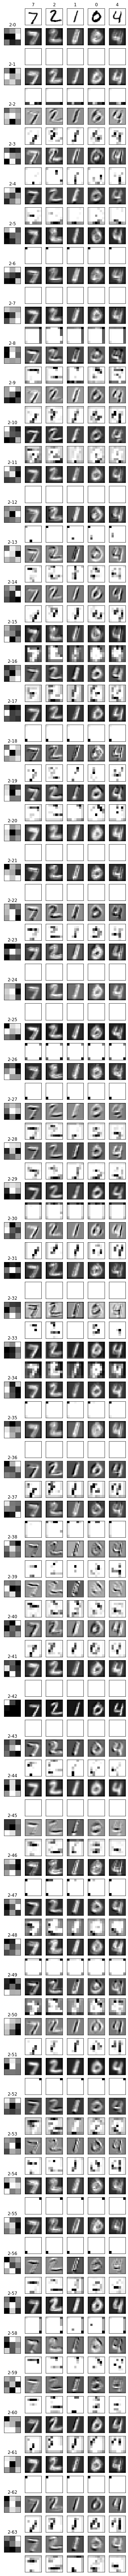

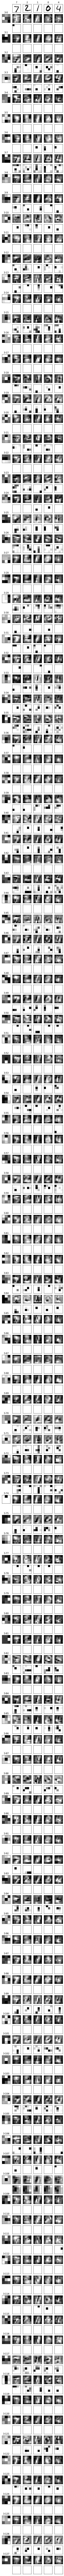

In [9]:
ncol = 5
def show_convolution_filter_results(w_conv, h_conv, h_pool, num_filters, layer_num):
    filter_vals, conv_vals, pool_vals = sess.run([w_conv, h_conv, h_pool], feed_dict = {x:mnist.test.images[:ncol]})

    fig = plt.figure(figsize = (ncol + 1, num_filters * 2 + 1))

    # show filters
    for i in range(num_filters):
        subplot = fig.add_subplot(num_filters * 2 + 1, ncol + 1, (ncol + 1) * (i + 1) * 2 + 1 - (ncol + 1))
        subplot.set_xticks([])
        subplot.set_yticks([])
        subplot.set_title('%d-%d' % (layer_num, i))
        subplot.imshow(filter_vals[:, :, 0, i], cmap = plt.cm.gray_r, interpolation = 'nearest')

    # show original input images
    for i in range(ncol):
        subplot = fig.add_subplot(num_filters * 2 + 1, ncol + 1, i + 2)
        subplot.set_xticks([])
        subplot.set_yticks([])
        subplot.set_title('%d' % np.argmax(mnist.test.labels[i]))
        subplot.imshow(mnist.test.images[i].reshape((28, 28)), vmin = 0, vmax = 1, cmap = plt.cm.gray_r, interpolation = 'nearest')

        # show convolutionary-filtered images
        for f in range(num_filters):
            subplot = fig.add_subplot(num_filters * 2 + 1, ncol + 1, (ncol + 1) * (f + 1) * 2 + i + 2 - (ncol + 1))
            subplot.set_xticks([])
            subplot.set_yticks([])
            subplot.imshow(conv_vals[i, :, :, f], cmap = plt.cm.gray_r, interpolation = 'nearest')

        # show max-pooled images
        for f in range(num_filters):
            subplot = fig.add_subplot(num_filters * 2 + 1, ncol + 1, (ncol + 1) * (f + 1) * 2 + i + 2)
            subplot.set_xticks([])
            subplot.set_yticks([])
            subplot.imshow(pool_vals[i, :, :, f], cmap = plt.cm.gray_r, interpolation = 'nearest')

# neural network 1
show_convolution_filter_results(w_conv11, h_conv11, h_pool11, num_filters1, 1)
show_convolution_filter_results(w_conv12, h_conv12, h_pool12, num_filters2, 2)
show_convolution_filter_results(w_conv13, h_conv13, h_pool13, num_filters3, 3)

# neural network 2
show_convolution_filter_results(w_conv21, h_conv21, h_pool21, num_filters1, 1)
show_convolution_filter_results(w_conv22, h_conv22, h_pool22, num_filters2, 2)
show_convolution_filter_results(w_conv23, h_conv23, h_pool23, num_filters3, 3)